In [38]:
#import libraries for data processing and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [39]:
#load data
df=pd.read_csv('/content/Cal_WF_data.csv')

Exploratory Data Analysis

In [40]:
df.shape

(100230, 47)

In [41]:
df.head()

,_id,OBJECTID,* Damage,* Street Number,* Street Name,"* Street Type (e.g. road, drive, lane, etc.)","Street Suffix (e.g. apt. 23, blding C)",* City,State,Zip Code,...,Fire Name (Secondary),APN (parcel),Assessed Improved Value (parcel),Year Built (parcel),Site Address (parcel),GLOBALID,Latitude,Longitude,x,y
0,1,1,No Damage,8376.0,Quail Canyon,Road,NaN,Winters,CA,NaN,...,Quail,101090290,510000.0,1997.0,8376 QUAIL CANYON RD VACAVILLE CA 95688,e1919a06-b4c6-476d-99e5-f0b45b070de8,38.474960,-122.044465,-13585927.70,4646740.750
1,2,2,Affected (1-9%),8402.0,Quail Canyon,Road,NaN,Winters,CA,NaN,...,Quail,101090270,573052.0,1980.0,8402 QUAIL CANYON RD VACAVILLE CA 95688,b090eeb6-5b18-421e-9723-af7c9144587c,38.477442,-122.043252,-13585792.71,4647093.599
2,3,3,No Damage,8430.0,Quail Canyon,Road,NaN,Winters,CA,NaN,...,Quail,101090310,350151.0,2004.0,8430 QUAIL CANYON RD VACAVILLE CA 95688,268da70b-753f-46aa-8fb1-327099337395,38.479357,-122.044585,-13585941.01,4647366.034
3,4,4,No Damage,3838.0,Putah Creek,Road,NaN,Winters,CA,NaN,...,Quail,103010240,134880.0,1981.0,3838 PUTAH CREEK RD WINTERS CA 95694,64d4a278-5ee9-414a-8bf4-247c5b5c60f9,38.487313,-122.015115,-13582660.52,4648497.399
4,5,5,No Damage,3830.0,Putah Creek,Road,NaN,Winters,CA,NaN,...,Quail,103010220,346648.0,1980.0,3830 PUTAH CREEK RD WINTERS CA 95694,1b44b214-01fd-4f06-b764-eb42a1ec93d7,38.485636,-122.016122,-13582772.60,4648258.826


In [42]:
#Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100230 entries, 0 to 100229
Data columns (total 47 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   _id                                                           100230 non-null  int64  
 1   OBJECTID                                                      100230 non-null  int64  
 2   * Damage                                                      100230 non-null  object 
 3   * Street Number                                               95810 non-null   float64
 4   * Street Name                                                 94744 non-null   object 
 5   * Street Type (e.g. road, drive, lane, etc.)                  87033 non-null   object 
 6   Street Suffix (e.g. apt. 23, blding C)                        44148 non-null   object 
 7   * City                                                  

-->Inference: In this dataset, many columns have null values and some columns are of object data type, which have to be encoded for further analysis.

**📊Correlation between variables and narrowing down on potential influencers:**

Here, I am analyzing

1) Correlation between numerical values
2) How locality influences the value of a property
3) Damage across various city and county
4) Effect of Defensive actions taken
5) Relationship between 'What started fire?' and materials used in construction (Roof construction, Exterior siding, Deck/Porch on grade, Deck/Porch elevated, Patio Cover, Fence attached)
6) Geographical distribution of damage


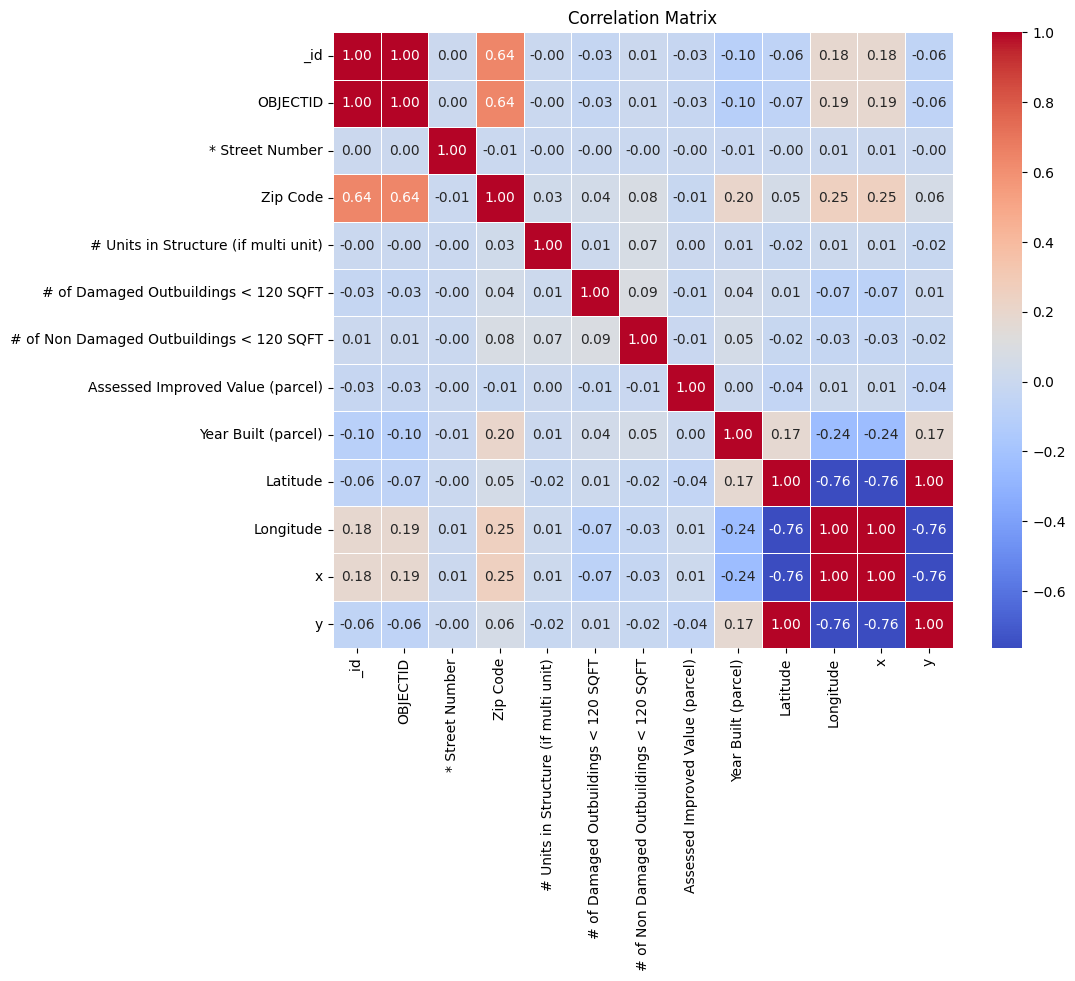

In [43]:
# 1) Correlation between numerical values:

#select numerical columns only
numerical_df = df.select_dtypes(include=['number'])

#Correlation matrix
correlation_matrix = numerical_df.corr()

#Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidth=0.5)
plt.title("Correlation Matrix")
plt.show()

Heatmap Inference:
*Number of units in structure has mild correlation with number of damaged outbuildings
*Year built has positive correlation with Latitude and negative correlation with Longitude. This can be further explored by plotting geospatial distribution
*Assessed improved value also has positive correlation with Latitude and negative correlation with Longitude.
*Zip code and year built have some correlation

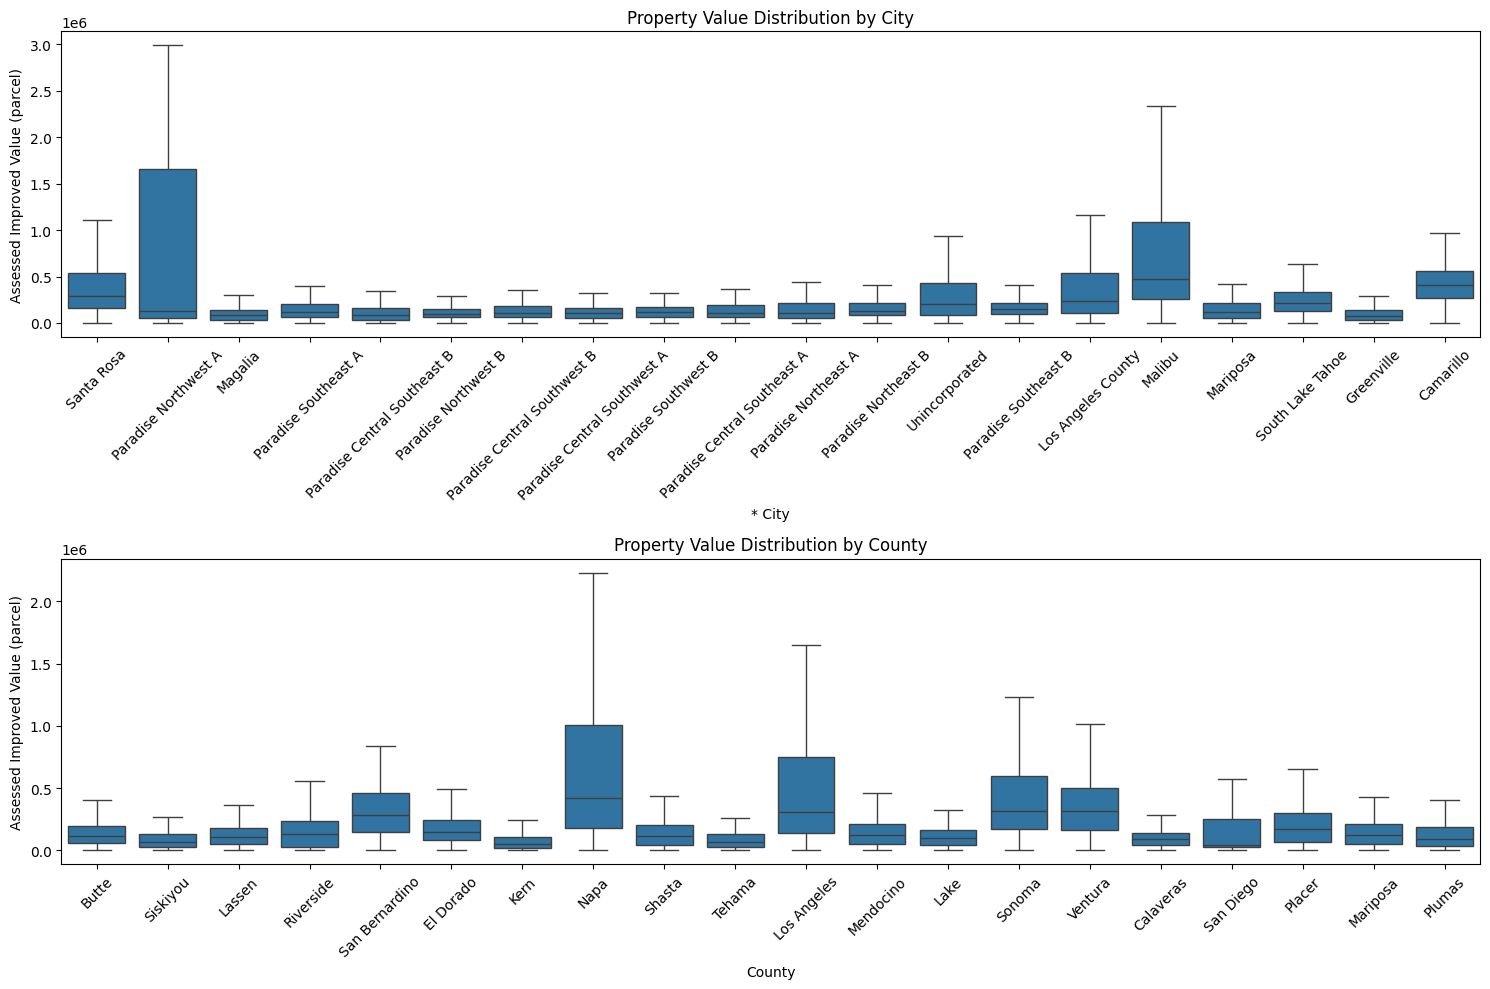

In [44]:
#2) How locality influences the value of a property

# Remove missing values for City, County, and Property Value
df_filtered = df.dropna(subset=["* City", "County", "Assessed Improved Value (parcel)"])

# Limit to top 20 most common cities/counties
top_cities = df_filtered["* City"].value_counts().head(20).index
top_counties = df_filtered["County"].value_counts().head(20).index

df_cities = df_filtered[df_filtered["* City"].isin(top_cities)]
df_counties = df_filtered[df_filtered["County"].isin(top_counties)]

plt.figure(figsize=(15, 10))

# Boxplot for property value by City
plt.subplot(2, 1, 1)
sns.boxplot(
    data=df_cities,
    x="* City",
    y="Assessed Improved Value (parcel)",
    showfliers=False  # Hide extreme outliers for clarity
)
plt.xticks(rotation=45)
plt.title("Property Value Distribution by City")

# Boxplot for property value by County
plt.subplot(2, 1, 2)
sns.boxplot(
    data=df_counties,
    x="County",
    y="Assessed Improved Value (parcel)",
    showfliers=False
)
plt.xticks(rotation=45)
plt.title("Property Value Distribution by County")

plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

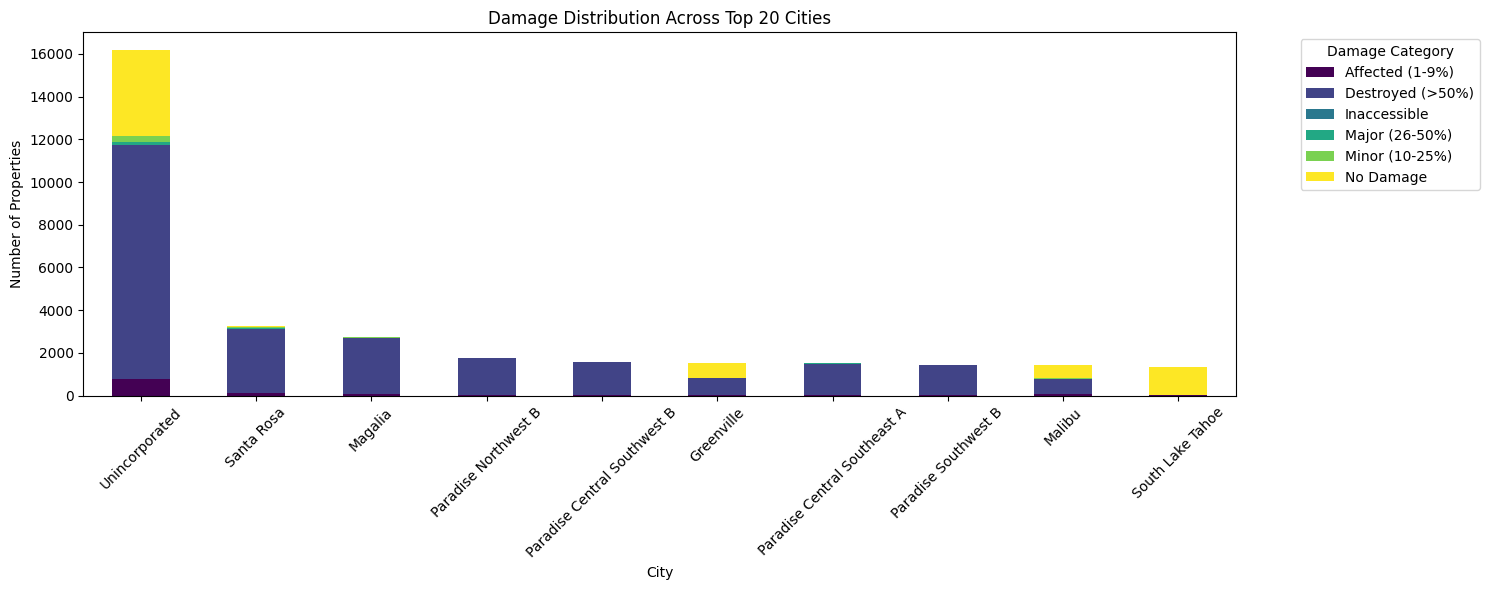

* Damage,Affected (1-9%),Destroyed (>50%),Inaccessible,Major (26-50%),Minor (10-25%),No Damage
* City,,,,,,
Unincorporated,773.0,10984.0,0.0,142.0,268.0,4034.0
Santa Rosa,116.0,3012.0,0.0,22.0,41.0,87.0
Magalia,67.0,2650.0,0.0,2.0,8.0,0.0
Paradise Northwest B,42.0,1725.0,0.0,1.0,8.0,0.0
Paradise Central Southwest B,47.0,1510.0,0.0,3.0,14.0,0.0
Greenville,21.0,790.0,2.0,1.0,7.0,711.0
Paradise Central Southeast A,37.0,1466.0,0.0,1.0,6.0,0.0
Paradise Southwest B,40.0,1393.0,0.0,0.0,7.0,0.0
Malibu,98.0,667.0,9.0,26.0,29.0,607.0


In [45]:
# 3a) Damage across cities:

# Count damage occurrences per city
damage_by_city = df.groupby(["* City", "* Damage"]).size().unstack().fillna(0)

# Limit to top 10 cities with the most records
top_cities_damage = damage_by_city.sum(axis=1).sort_values(ascending=False).head(10).index
damage_top_cities = damage_by_city.loc[top_cities_damage]

# Plot stacked bar chart
plt.figure(figsize=(15, 8))
damage_top_cities.plot(kind="bar", stacked=True, colormap="viridis", figsize=(15, 6))

# Formatting
plt.title("Damage Distribution Across Top 20 Cities")
plt.xlabel("City")
plt.ylabel("Number of Properties")
plt.xticks(rotation=45)
plt.legend(title="Damage Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()

# Display the data table for reference
damage_top_cities

<Figure size 1500x800 with 0 Axes>

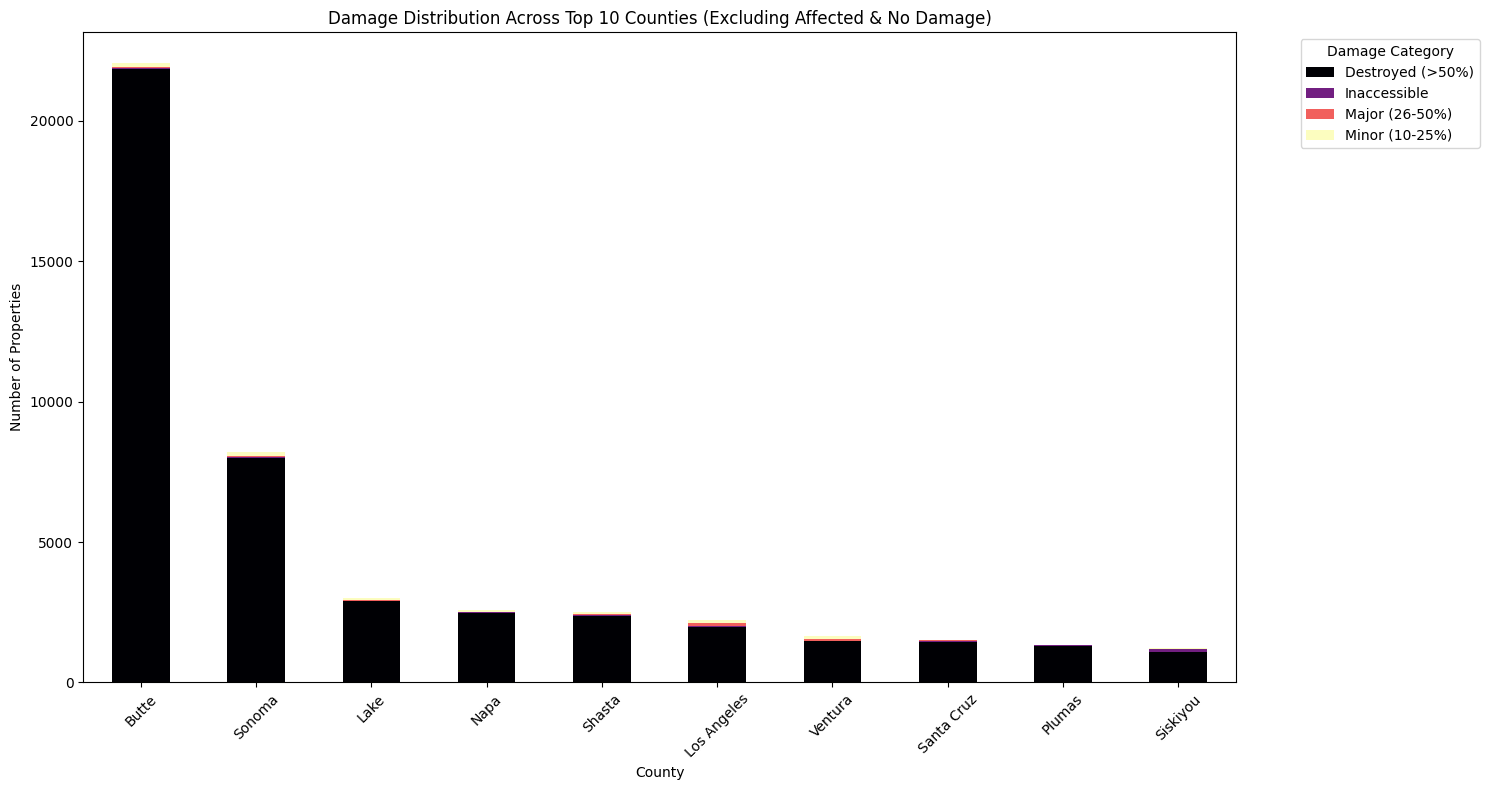

* Damage,Destroyed (>50%),Inaccessible,Major (26-50%),Minor (10-25%)
County,,,,
Butte,21866.0,4.0,51.0,133.0
Sonoma,8010.0,5.0,56.0,133.0
Lake,2905.0,1.0,31.0,53.0
Napa,2481.0,11.0,29.0,60.0
Shasta,2379.0,14.0,47.0,53.0
Los Angeles,1975.0,48.0,89.0,113.0
Ventura,1471.0,12.0,68.0,119.0
Santa Cruz,1437.0,55.0,11.0,23.0
Plumas,1314.0,9.0,10.0,16.0


In [46]:
# 3b) Damage across counties:
# Filter out "Affected (1-9%)" and "No Damage" categories for counties
filtered_df = df[~df["* Damage"].isin(["Affected (1-9%)", "No Damage"])]

# Count damage occurrences per county
damage_by_county_filtered = filtered_df.groupby(["County", "* Damage"]).size().unstack().fillna(0)

# Limit to top 10 counties with the most damage records
top_10_counties = damage_by_county_filtered.sum(axis=1).sort_values(ascending=False).head(10).index
damage_top_10_counties = damage_by_county_filtered.loc[top_10_counties]

# Plot stacked bar chart for top 10 counties
plt.figure(figsize=(15, 8))
damage_top_10_counties.plot(kind="bar", stacked=True, colormap="magma", figsize=(15, 8))

# Formatting
plt.title("Damage Distribution Across Top 10 Counties (Excluding Affected & No Damage)")
plt.xlabel("County")
plt.ylabel("Number of Properties")
plt.xticks(rotation=45)
plt.legend(title="Damage Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

damage_top_10_counties

<Figure size 1500x800 with 0 Axes>

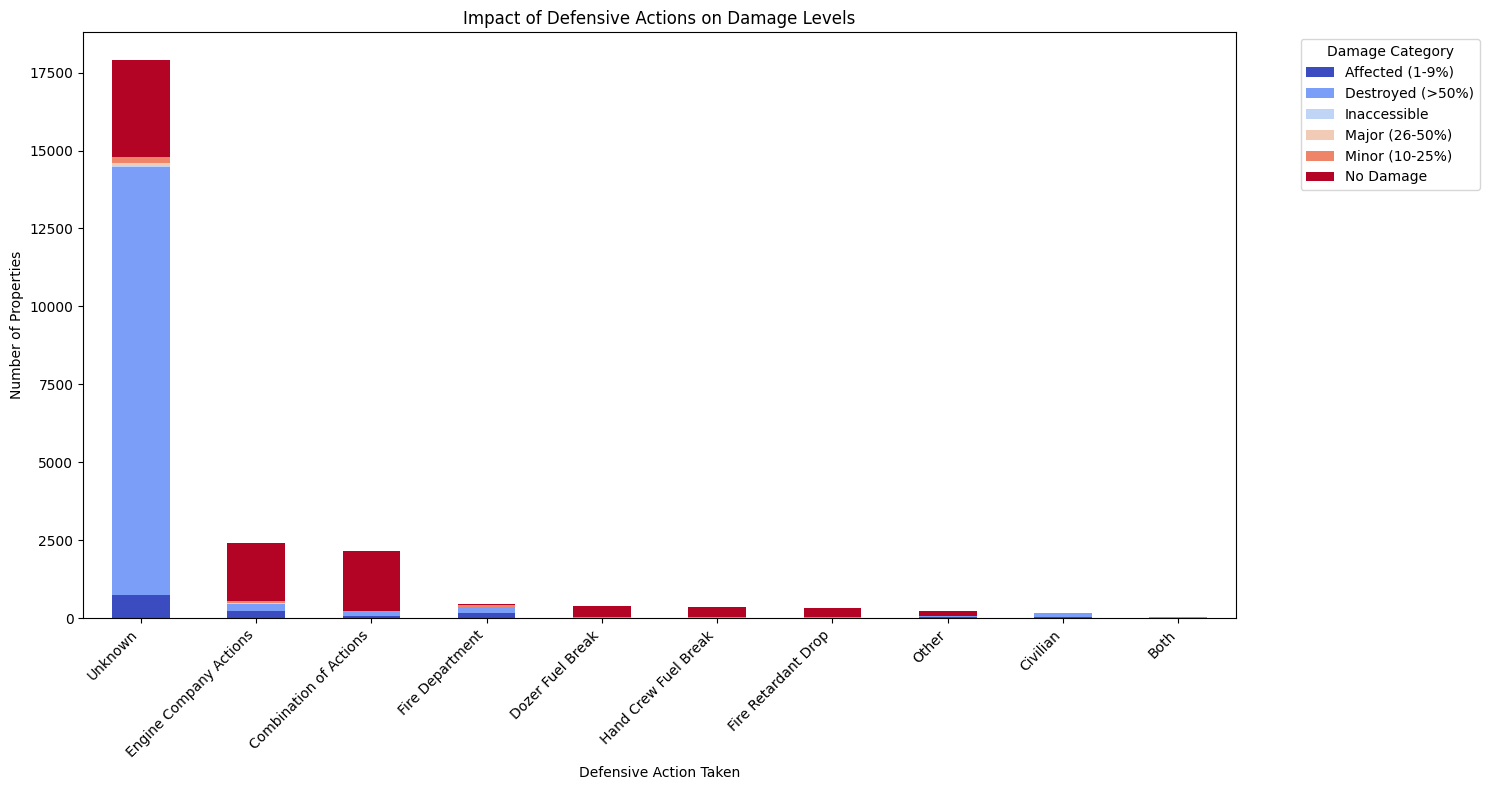

(array(['Hand Crew Fuel Break', 'Combination of Actions',
        'Fire Retardant Drop', 'Unknown', 'Engine Company Actions',
        'Other', 'Dozer Fuel Break', 'Fire Department', 'Civilian', 'Both'],
       dtype=object),
 * Damage                         Affected (1-9%)  Destroyed (>50%)  \
 Structure Defense Actions Taken                                      
 Unknown                                    761.0           13723.0   
 Engine Company Actions                     243.0             210.0   
 Combination of Actions                      65.0             147.0   
 Fire Department                            184.0             168.0   
 Dozer Fuel Break                            17.0              40.0   
 Hand Crew Fuel Break                        17.0               9.0   
 Fire Retardant Drop                         10.0              40.0   
 Other                                       42.0              24.0   
 Civilian                                    50.0             119

In [47]:
# 4) Effect of Defensive actions taken

# Check unique defensive actions
unique_defensive_actions = df["Structure Defense Actions Taken"].dropna().unique()

# Count occurrences of defensive actions vs damage
damage_by_defense = df.groupby(["Structure Defense Actions Taken", "* Damage"]).size().unstack().fillna(0)

# Limit to top 10 most common defensive actions
top_defensive_actions = damage_by_defense.sum(axis=1).sort_values(ascending=False).head(10).index
damage_top_defensive_actions = damage_by_defense.loc[top_defensive_actions]

# Plot stacked bar chart
plt.figure(figsize=(15, 8))
damage_top_defensive_actions.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(15, 8))

# Formatting
plt.title("Impact of Defensive Actions on Damage Levels")
plt.xlabel("Defensive Action Taken")
plt.ylabel("Number of Properties")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Damage Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()

# Display the data table for reference
unique_defensive_actions, damage_top_defensive_actions


-->Most Effective Defensive Actions (Higher No Damage Cases):
*   "Engine Company Actions" (1,843 No Damage cases)
*   "Combination of Actions" (1,912 No Damage cases)
*   "Dozer Fuel Break" and "Hand Crew Fuel Break" (332 No Damage cases each)
*   "Fire Retardant Drop" (277 No Damage cases)

-->Least Effective Defensive Actions (Higher Damage Rate):
*  "Civilian" and "Both" actions had very few No Damage cases
*   "Unknown" had the most destroyed properties, meaning no clear action was recorded





In [48]:
# 5) Relationship between 'What started fire?' and materials used in construction (Roof construction, Exterior siding, Deck/Porch on grade, Deck/Porch elevated, Patio Cover, Fence attached)

print(df["If Affected 1-9% - What started fire?"].dropna().unique())

['Unknown' 'Direct flame impingement' 'Embers' 'Radiant Heat'
 'Not Applicable' 'Bushes' 'Embers or overheated electrical motor'
 'Post on structure' '0-10']


<Figure size 1200x600 with 0 Axes>

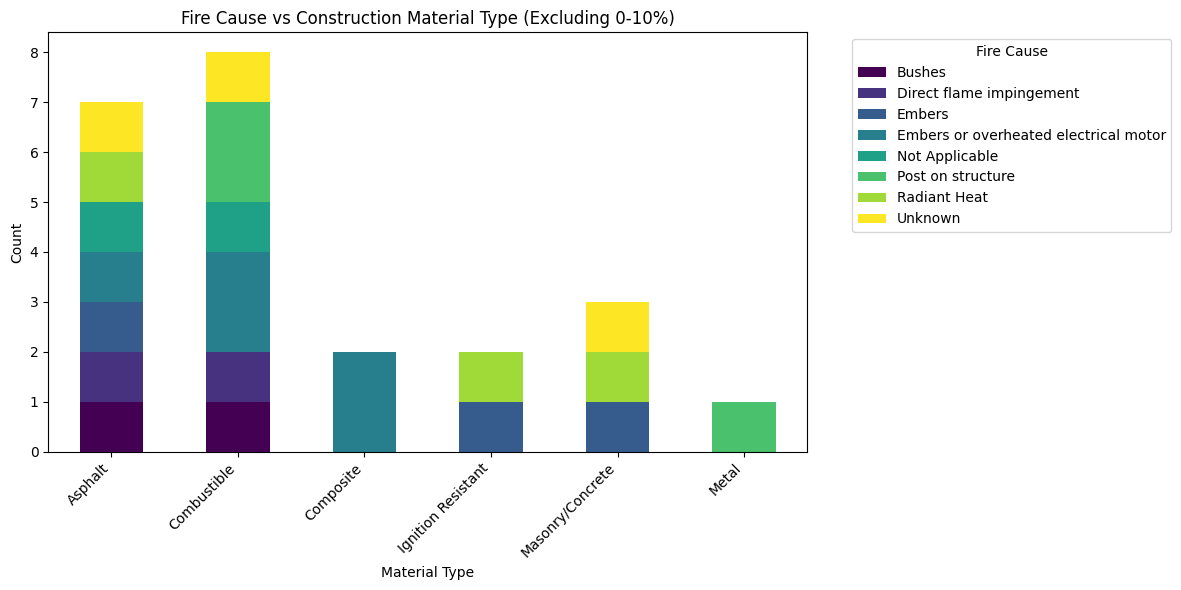

In [49]:
# Define relevant construction materials to keep
valid_materials = ["Wood", "Asphalt", "Metal", "Combustible", "Ignition Resistant", "Masonry/Concrete", "Composite"]

# Select relevant material columns
material_columns = ["* Roof Construction", "* Exterior Siding", "* Deck/Porch On Grade",
                    "* Deck/Porch Elevated", "* Patio Cover/Carport Attached to Structure", "* Fence Attached to Structure"]

# Remove fire causes labeled as "0-10%"
df_filtered = df[~df["If Affected 1-9% - What started fire?"].str.contains("0-10", na=False, case=False)]

# Group by fire cause and find the most common material (mode)
fire_cause_vs_materials = df_filtered.groupby("If Affected 1-9% - What started fire?")[material_columns] \
                            .agg(lambda x: x.mode()[0] if not x.mode().empty else "Other")

# Filter to keep only valid materials
fire_cause_vs_materials = fire_cause_vs_materials.applymap(lambda x: x if x in valid_materials else "Other")

# Melt dataframe for better visualization
fire_cause_melted = fire_cause_vs_materials.reset_index().melt(id_vars=["If Affected 1-9% - What started fire?"],
                                                                var_name="Construction Feature",
                                                                value_name="Material Type")

# Drop "Other" values
fire_cause_melted = fire_cause_melted[fire_cause_melted["Material Type"] != "Other"]

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
fire_cause_pivot = fire_cause_melted.pivot_table(index="Material Type", columns="If Affected 1-9% - What started fire?", aggfunc="size", fill_value=0)
fire_cause_pivot.plot(kind="bar", stacked=True, colormap="viridis", figsize=(12, 6))

# Formatting
plt.title("Fire Cause vs Construction Material Type (Excluding 0-10%)")
plt.xlabel("Material Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Fire Cause", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()

-->Combustible construction materials clearly had extensive damage, where the fire was often started by embers and overheated electrical motor. Asphalt based constructions were invariably affected by all kinds of fire starters and led to extensive damage. Metal based construction was affected only due to presence of some other post on structure which led to fire.

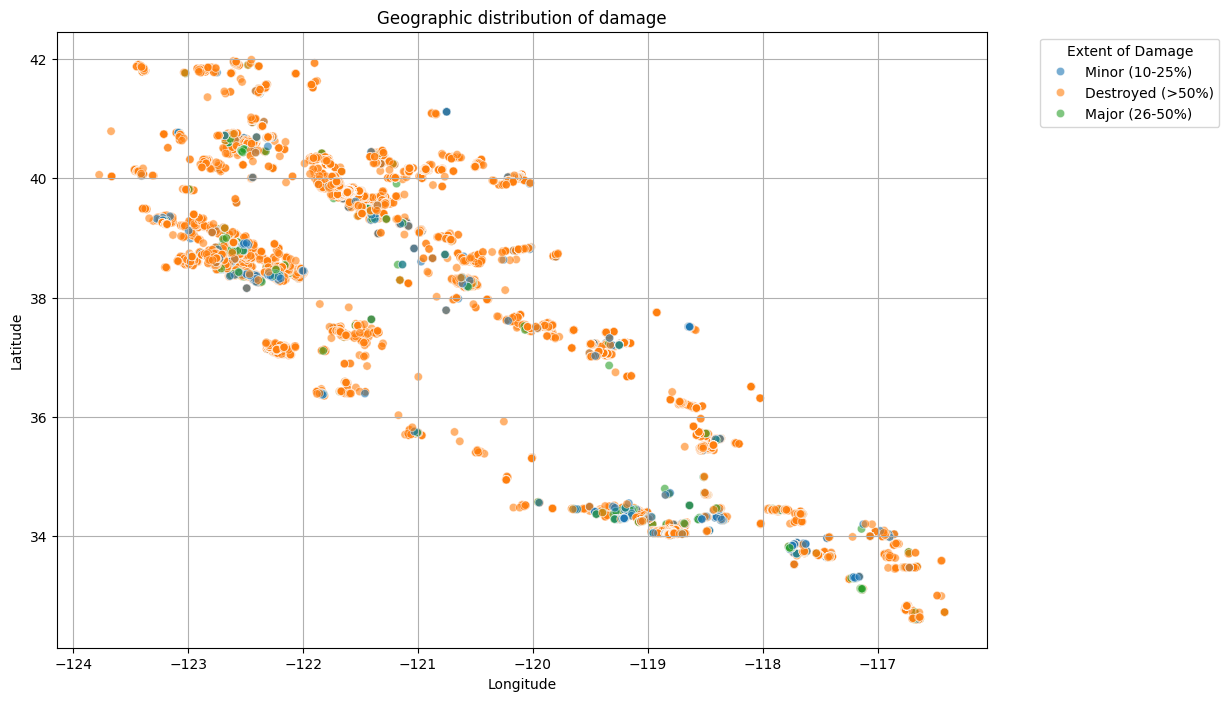

In [50]:
#6) Analyzing latitude, longitude and Extent of damage

#filtering out minor data points
filtered_df = df[~df['* Damage'].isin(["No Damage", "Affected (1-9%)","Inaccessible"])]

#Scatter plot using seaborn
plt.figure(figsize=(12,8))
sns.scatterplot(
    data=filtered_df,
    x="Longitude",
    y="Latitude",
    hue="* Damage",
    alpha=0.6, #Transparency for better visibility
    palette="tab10"
)

#Plot formatting
plt.title("Geographic distribution of damage")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Extent of Damage", bbox_to_anchor=(1.05,1),loc='upper left')
plt.grid(True)

plt.show()

--> The strong negative correlation between longitude and latitude is explained by the shape of California. This inference can be used to deep dive into other geographical factors that may increase susceptibility to fire



**Model Selection and Training:**

Here my goal is **Fire Risk Classification**, based on Geographical factors and Structural factors of the building. After experimenting with models like Random Forest, XGBoost, LightGBM was found to be more accurate and has better class balance overall.


In [51]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter


In [52]:
# Load dataset
df = pd.read_csv("/content/Cal_WF_data.csv")

# Define mapping for Fire Risk Classification
fire_risk_mapping = {
    "No Damage": 0,           # Low Risk
    "Affected (1-9%)": 0,      # Low Risk
    "Minor (10-25%)": 1,       # Medium Risk
    "Major (26-50%)": 1,       # Medium Risk
    "Destroyed (>50%)": 2      # High Risk
}

# Apply mapping to create a new classification column
df["Fire_Risk_Category"] = df["* Damage"].map(fire_risk_mapping)

# Define predictor variables
numerical_features = ["Latitude", "Longitude"]
categorical_features = ["County", "* City", "* Roof Construction", "* Exterior Siding",
                        "* Deck/Porch On Grade", "* Deck/Porch Elevated",
                        "* Patio Cover/Carport Attached to Structure", "* Fence Attached to Structure",
                        "Structure Defense Actions Taken"]

# Drop rows with missing values
df = df.dropna(subset=numerical_features + categorical_features + ["Fire_Risk_Category"])

# One-Hot Encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Define X (features) and y (target variable)
X = df_encoded[numerical_features + list(df_encoded.columns[df_encoded.columns.str.startswith(tuple(categorical_features))])]
y = df["Fire_Risk_Category"]  # Target is numeric (0, 1, 2)

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check dataset shape
print(f"Training Data: {X_train.shape}, Test Data: {X_test.shape}")

Training Data: (16361, 335), Test Data: (4091, 335)


In [53]:
# Define class weights to improve Medium Risk classification
class_weights = {0:1, 1:5, 2:1}  # Low: 1, Medium: 5, High: 1

# Initialize LightGBM Classifier
lgb_clf = LGBMClassifier(
    n_estimators=300,        # Number of boosting iterations
    learning_rate=0.05,      # Step size
    max_depth=7,             # Tree depth
    class_weight=class_weights,  # Adjust class importance
    random_state=42
)

# Train the model on the original (unbalanced) dataset
print("Training LightGBM Without SMOTE...")
lgb_clf.fit(X_train, y_train)
print("LightGBM Model Training Complete!\n")

# Make predictions
y_pred_lgb = lgb_clf.predict(X_test)

Training LightGBM Without SMOTE...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004730 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 796
[LightGBM] [Info] Number of data points in the train set: 16361, number of used features: 145
[LightGBM] [Info] Start training from score -1.223708
[LightGBM] [Info] Start training from score -2.366125
[LightGBM] [Info] Start training from score -0.490992
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

LightGBM Model Accuracy: 0.9093

Classification Report:
               precision    recall  f1-score   support

    Low Risk       0.90      0.87      0.89      1301
 Medium Risk       0.19      0.23      0.21        83
   High Risk       0.94      0.95      0.94      2707

    accuracy                           0.91      4091
   macro avg       0.68      0.68      0.68      4091
weighted avg       0.91      0.91      0.91      4091



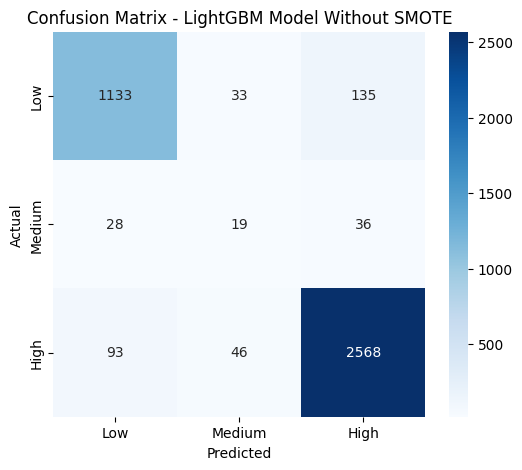

In [54]:
# Compute accuracy
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM Model Accuracy: {accuracy_lgb:.4f}\n")

# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_lgb, target_names=["Low Risk", "Medium Risk", "High Risk"]))

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_lgb), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LightGBM Model Without SMOTE")
plt.show()

In [55]:
# Extract feature importance from the trained LightGBM model
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lgb_clf.feature_importances_
})

# Sort features by importance
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Display top 10 most important features
print(" Top 10 Important Features:\n", feature_importance.head(10))

 Top 10 Important Features:
                                      Feature  Importance
1                                  Longitude        5215
0                                   Latitude        4716
297                * Roof Construction_Metal         792
334  Structure Defense Actions Taken_Unknown         577
309                   * Exterior Siding_Wood         554
311      * Deck/Porch On Grade_No Deck/Porch         510
323   * Fence Attached to Structure_No Fence         467
302     * Exterior Siding_Ignition Resistant         466
316      * Deck/Porch Elevated_No Deck/Porch         430
310   * Deck/Porch On Grade_Masonry/Concrete         410


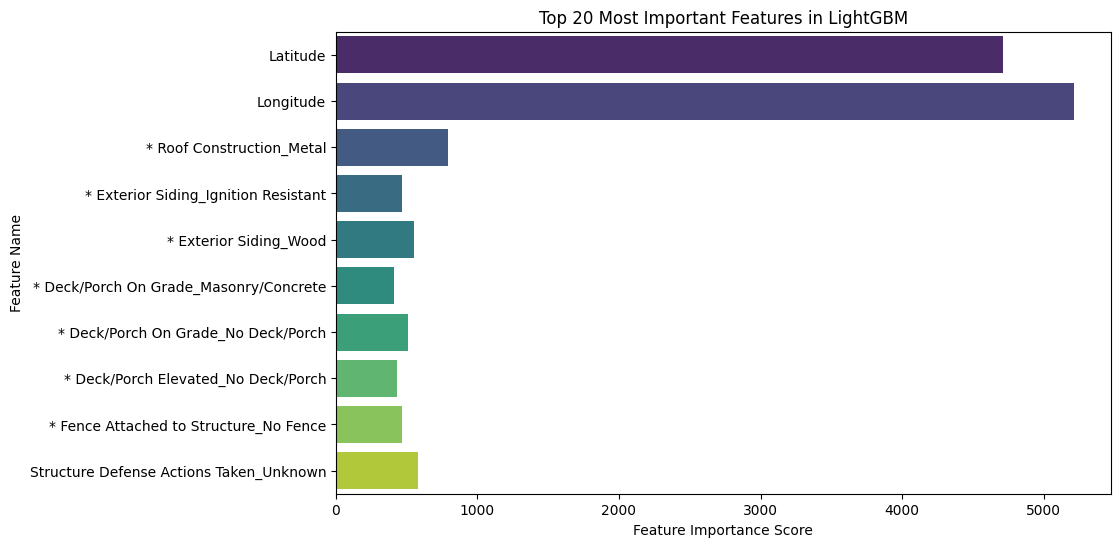

In [56]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance['Importance'].head(20), y=feature_importance['Feature'].head(10), palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.title("Top 20 Most Important Features in LightGBM")
plt.show()

**Final Summary**

* Overall accuracy: 90.93% for LightGBM model
* Good Low & High Risk classification (Stable F1-scores).
* Latitude & Longitude were the strongest predictors, indicating fire-prone zones are geographically defined.
* Roof & Siding Materials played a crucial role, with metal and ignition-resistant materials reducing risk.
* Defensive Actions Taken had an impact, but missing data reduced the model's confidence.





